5.571972628


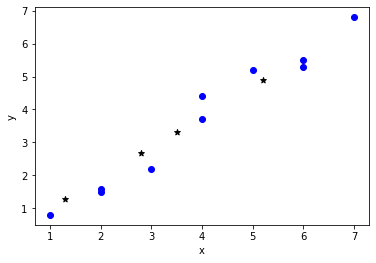

(442, 10)
2960.1229914979613
1984.74624547466
1729.7738773110927
1627.6313188621893
1572.7594881683715
1539.5508092659084
1518.6139706969352
1505.18745041147
1496.4839556100546
1490.7883504050646
1487.02495657815
1484.5122232041992
1482.8149885868895
1481.6534805885071
1480.8466247976992
1480.2764434158958
1479.865546786167
1479.5628140620279
1479.3342299057756
1479.1569872186712
1479.0156704666115
1478.8997716076012
1478.8020640163982
1478.7175316918756
1478.6426597055656
1478.5749609087388
1478.5126580122144
1478.454468440121
1478.399457585006
1478.346937887091
1478.2963988278907
1478.2474579352606
1478.1998261818974
1478.1532833254585
1478.1076601744603
1478.062825721594
1478.0186777284687
1477.975135779601
1477.9321361185648
1477.889627781425
1477.8475696822725
1477.8059284029846
1477.7646765076447
1477.72379125052
1477.683253581075
1477.6430473744476
1477.6031588339488
1477.5635760254204
1477.5242885130954
1477.48528707389
[232.22305668 123.87481969 166.12805033 170.23901231 228.1

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import numpy as np


def compute_prediction(X, weights):
    """
    Compute the prediction y_hat based on current weights
    """
    predictions = np.dot(X, weights)
    return predictions


def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    Update weights by one step and return updated wights
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights


def compute_cost(X, y, weights):
    """
    Compute the cost J(w)
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean((predictions - y) ** 2 / 2.0)
    return cost


def train_linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """
    Train a linear regression model with gradient descent, and return trained model
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 100 (for example) iterations
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights


def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)


# A small example
X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])

y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])

weights = train_linear_regression(X_train, y_train, max_iter=100, learning_rate=0.01, fit_intercept=True)

X_test = np.array([[1.3], [3.5], [5.2], [2.8]])

predictions = predict(X_test, weights)

import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train, marker='o', c='b')
plt.scatter(X_test[:, 0], predictions, marker='*', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# The diabetes example
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)

num_test = 30
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]

weights = train_linear_regression(X_train, y_train, max_iter=5000, learning_rate=1, fit_intercept=True)

X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]

predictions = predict(X_test, weights)

print(predictions)
print(y_test)



# Directly use SGDRegressor from scikit-learn
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, learning_rate='constant', eta0=0.01,
                         max_iter=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)




import tensorflow as tf

layer0 = tf.keras.layers.Dense(units=1, input_shape=[X_train.shape[1]])
model = tf.keras.Sequential(layer0)

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(1))

model.fit(X_train, y_train, epochs=100, verbose=True)

predictions = model.predict(X_test)[:, 0]
print(predictions)



